```
Author: Sreejith S

U4A2 - Handwritten Digits - mnist dataset
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%reload_ext autoreload
%matplotlib inline
%autoreload 2
%config InlineBackend.figure_format = 'retina'



import tensorflow as tf
from tensorflow.keras.models import load_model

In [115]:
print(tf.__version__)

2.3.0


In [111]:
mnist = tf.keras.datasets.mnist
#Train-Test Split
(X_train, y_train), (X_test, y_test) = mnist.load_data() 
#local copy at ~/.keras/datasets/mnist.npz

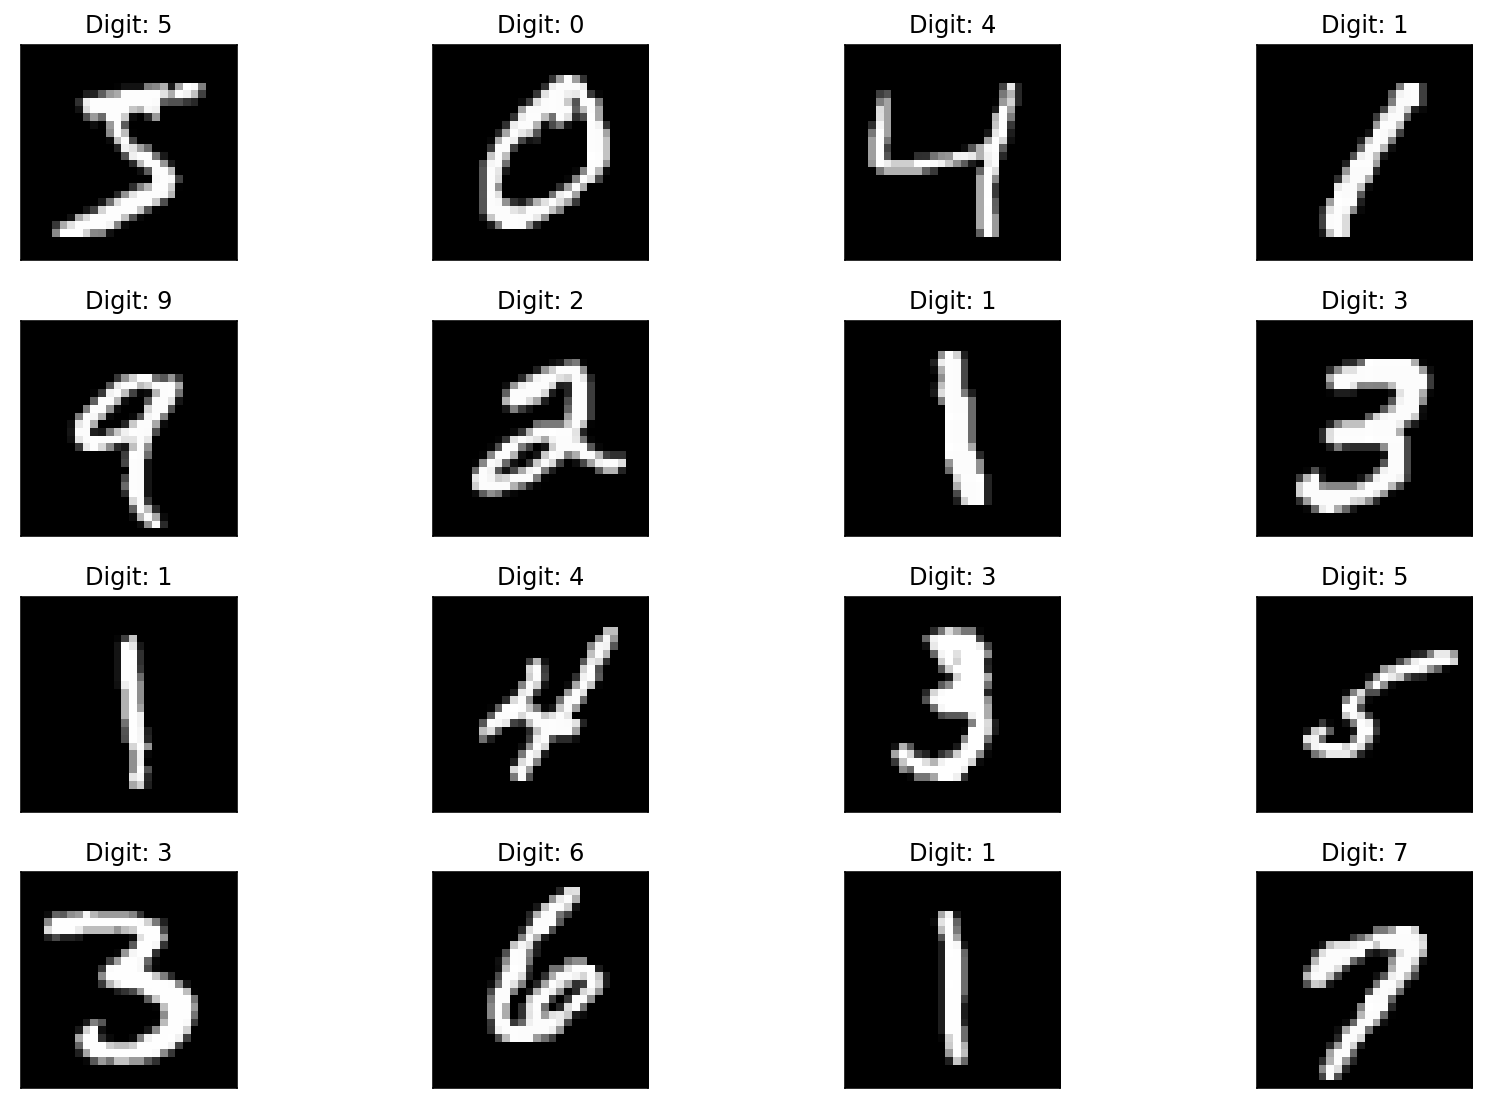

In [93]:
fig = plt.figure(figsize=(12, 8))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.tight_layout()
    plt.imshow(X_train[i], cmap='gray', interpolation='none')
    plt.title("Digit: {}".format(y_train[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

### Pixel Value Distribution

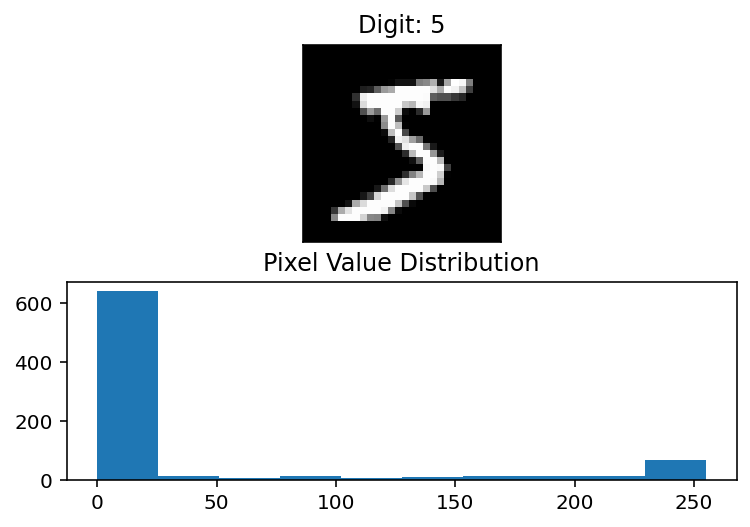

In [94]:
fig = plt.figure()
plt.subplot(2,1,1)
plt.imshow(X_train[0], cmap='gray', interpolation='none')
plt.title("Digit: {}".format(y_train[0]))
plt.xticks([])
plt.yticks([])
plt.subplot(2,1,2)
plt.hist(X_train[0].reshape(784))
plt.title("Pixel Value Distribution")
plt.show()

### Normalizing the data for faster training

In [97]:
X_train, X_test = X_train / 255.0, X_test / 255.0

### One-hot Encoding

Since our prediction categories are digits from 0 to 9, we use one-hot encoding to get a vector of length equal to the number of categories.

`8 -> [0,0,0,0,0,0,0,8,0]`

```python
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)```

Using `np.argmax` instead of one-hot encoding to get the corresponding class from `softmax` output based on the highest probability.

### Building the model

The model will have an input layer, two hidden layers and an output layer.

We use `Flatten()` to specify the input shape. It will reshape (28, 28) array to (784, 1).

`Dropout` - To prevent overfitting. Here we randomly keep some network weights fixed when we would normally update them so that the network doesn't rely too much on very few nodes.

In [192]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)), #Flatten to (784, 1)
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        #tf.keras.layers.Dropout(0.2), #dropout right before the last layer can hurt performance
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [193]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=128, epochs=15,
                   verbose=2, validation_data=(X_test, y_test))

Epoch 1/15
469/469 - 4s - loss: 2.7353 - accuracy: 0.8753 - val_loss: 0.4894 - val_accuracy: 0.9328
Epoch 2/15
469/469 - 3s - loss: 0.5105 - accuracy: 0.9213 - val_loss: 0.4183 - val_accuracy: 0.9369
Epoch 3/15
469/469 - 3s - loss: 0.3878 - accuracy: 0.9324 - val_loss: 0.3344 - val_accuracy: 0.9470
Epoch 4/15
469/469 - 4s - loss: 0.3168 - accuracy: 0.9426 - val_loss: 0.2960 - val_accuracy: 0.9539
Epoch 5/15
469/469 - 4s - loss: 0.2750 - accuracy: 0.9482 - val_loss: 0.2387 - val_accuracy: 0.9580
Epoch 6/15
469/469 - 3s - loss: 0.2227 - accuracy: 0.9554 - val_loss: 0.1975 - val_accuracy: 0.9631
Epoch 7/15
469/469 - 3s - loss: 0.1752 - accuracy: 0.9620 - val_loss: 0.1676 - val_accuracy: 0.9635
Epoch 8/15
469/469 - 3s - loss: 0.1316 - accuracy: 0.9687 - val_loss: 0.1531 - val_accuracy: 0.9670
Epoch 9/15
469/469 - 3s - loss: 0.1206 - accuracy: 0.9686 - val_loss: 0.1196 - val_accuracy: 0.9687
Epoch 10/15
469/469 - 3s - loss: 0.1135 - accuracy: 0.9711 - val_loss: 0.1306 - val_accuracy: 0.9688

In [185]:
#Saving results to file
model.save('results_keras_mnist_with_dropout.h5')

### A model without dropout layers

In [186]:
model_wo_dropout = tf.keras.models.Sequential([
                   tf.keras.layers.Flatten(input_shape=(28, 28)),
                   tf.keras.layers.Dense(512, activation=tf.nn.relu),
                   tf.keras.layers.Dense(512, activation=tf.nn.relu),
                   tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model_wo_dropout.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_wo_dropout = model_wo_dropout.fit(X_train, y_train, batch_size=128, epochs=15,
                    verbose=2, validation_data=(X_test, y_test)) #validation_split=0.2)

Epoch 1/15
469/469 - 4s - loss: 2.1970 - accuracy: 0.9092 - val_loss: 0.4964 - val_accuracy: 0.9367
Epoch 2/15
469/469 - 3s - loss: 0.3015 - accuracy: 0.9544 - val_loss: 0.3476 - val_accuracy: 0.9517
Epoch 3/15
469/469 - 3s - loss: 0.1865 - accuracy: 0.9662 - val_loss: 0.3085 - val_accuracy: 0.9568
Epoch 4/15
469/469 - 3s - loss: 0.1379 - accuracy: 0.9728 - val_loss: 0.3233 - val_accuracy: 0.9536
Epoch 5/15
469/469 - 3s - loss: 0.1143 - accuracy: 0.9758 - val_loss: 0.2338 - val_accuracy: 0.9653
Epoch 6/15
469/469 - 3s - loss: 0.1128 - accuracy: 0.9769 - val_loss: 0.2868 - val_accuracy: 0.9577
Epoch 7/15
469/469 - 3s - loss: 0.0995 - accuracy: 0.9778 - val_loss: 0.1921 - val_accuracy: 0.9662
Epoch 8/15
469/469 - 3s - loss: 0.0923 - accuracy: 0.9798 - val_loss: 0.2180 - val_accuracy: 0.9676
Epoch 9/15
469/469 - 3s - loss: 0.0827 - accuracy: 0.9807 - val_loss: 0.1685 - val_accuracy: 0.9685
Epoch 10/15
469/469 - 3s - loss: 0.0694 - accuracy: 0.9832 - val_loss: 0.2288 - val_accuracy: 0.9656

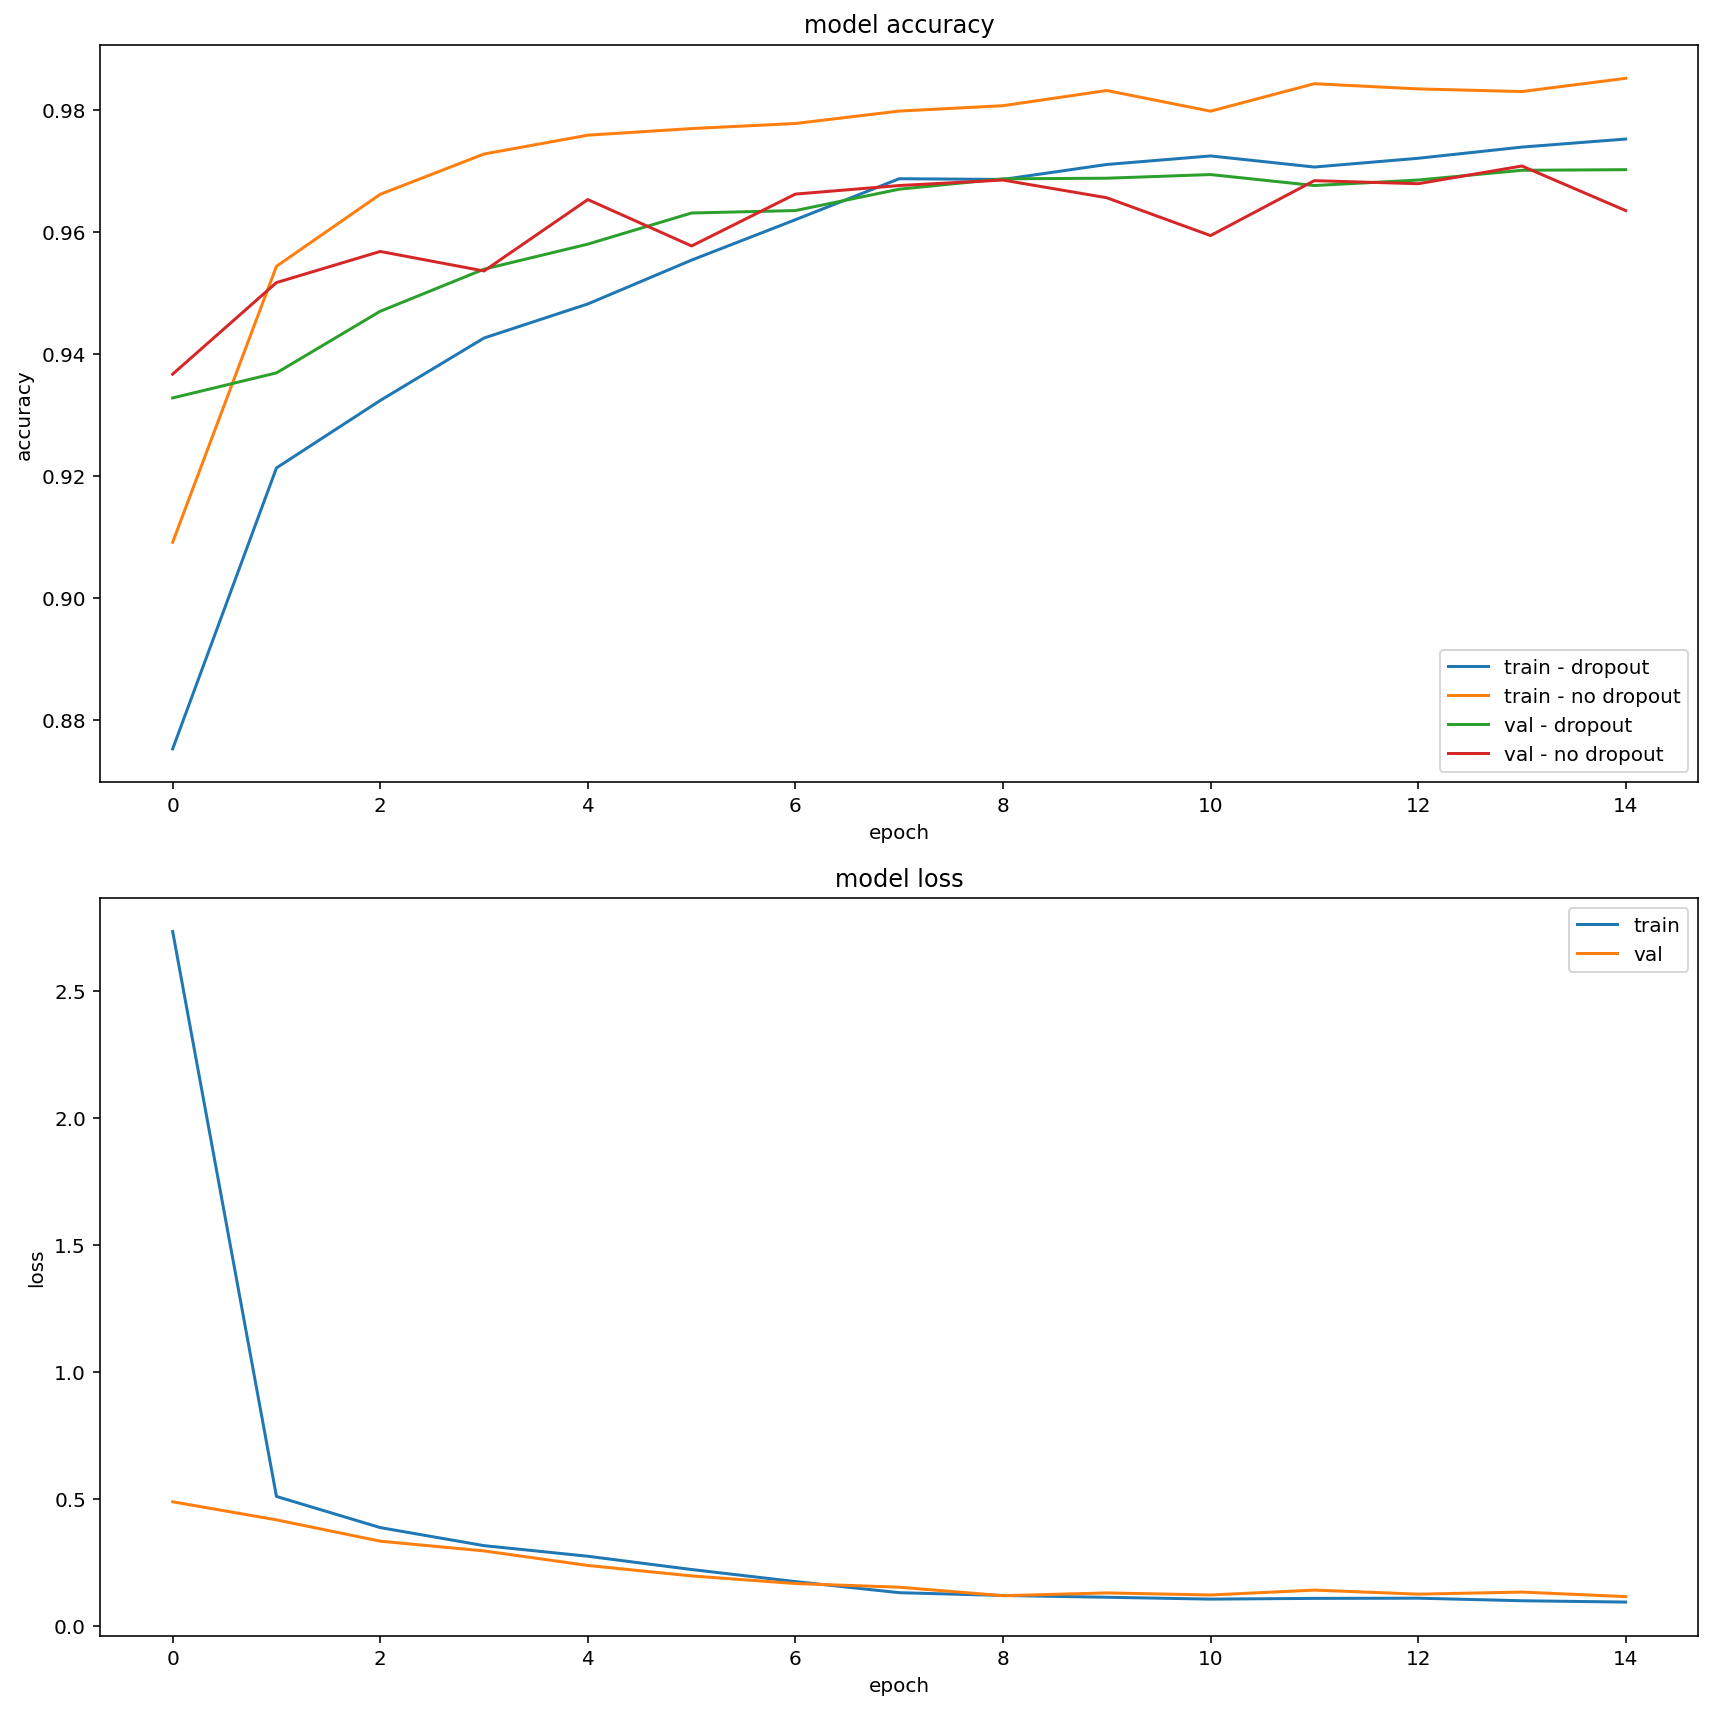

In [194]:
# plotting the metrics
fig = plt.figure(figsize=(12, 12))
plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history_wo_dropout.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history_wo_dropout.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train - dropout', 'train - no dropout', 'val - dropout', 'val - no dropout'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper right')

plt.tight_layout()

plt.show()

### Observation
 There is a slight improvement w.r.t to overfitting though. It can be observed that without drop out training accuracy is a little higher than with dropout train accuracy. While validation accuracy is more or less similar.


Sometimes `Dropout` doesn't show any *significant* indicator of reducing overfitting. This might be due to the following factors.

src: https://stats.stackexchange.com/questions/299292/dropout-makes-performance-worse

>Right before the last layer. This is generally a bad place to apply dropout, because the network has no ability to "correct" errors induced by dropout before the classification happens.

>When the network is small relative to the dataset, regularization is usually unnecessary. If the model capacity is already low, lowering it further by adding regularization will hurt performance. I noticed most of your networks were relatively small and shallow.

>When training time is limited. It's unclear if this is the case here, but if you don't train until convergence, dropout may give worse results. Usually dropout hurts performance at the start of training, but results in the final ''converged'' error being lower. Therefore, if you don't plan to train until convergence, you may not want to use dropout.



### Evaluate Model Performance

In [195]:
eval1 = model.evaluate(X_test, y_test, verbose=2)
eval2 = model_wo_dropout.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.1161 - accuracy: 0.9702
313/313 - 0s - loss: 0.1949 - accuracy: 0.9635



9833  classified correctly
167  classified incorrectly


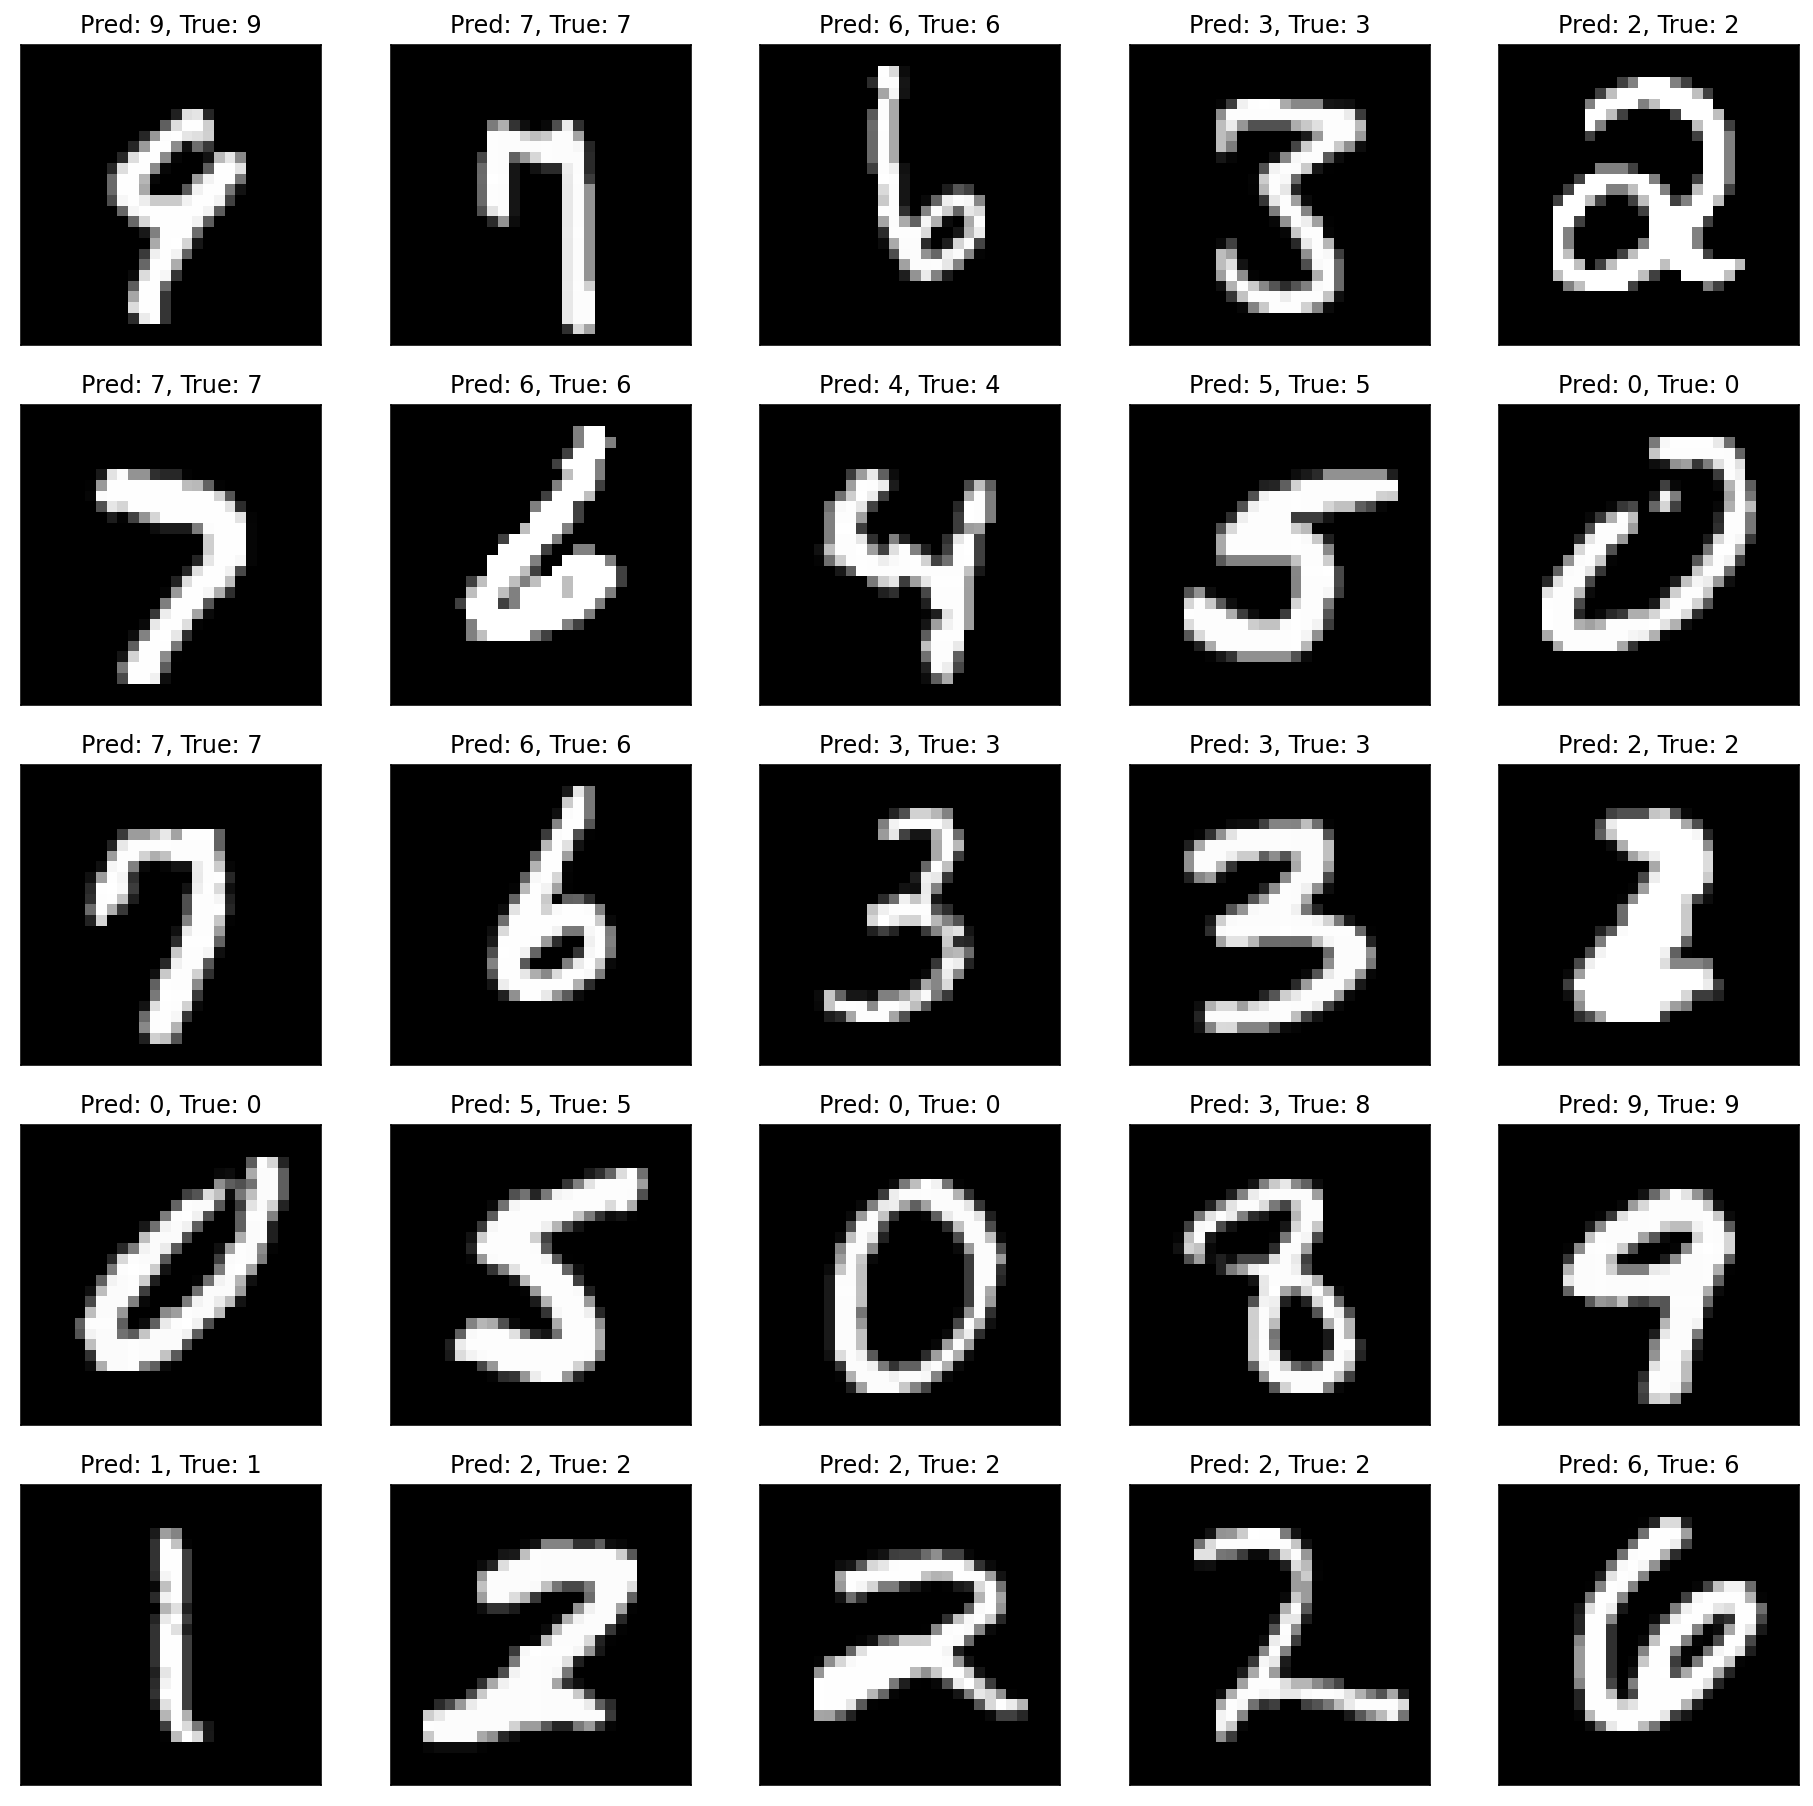

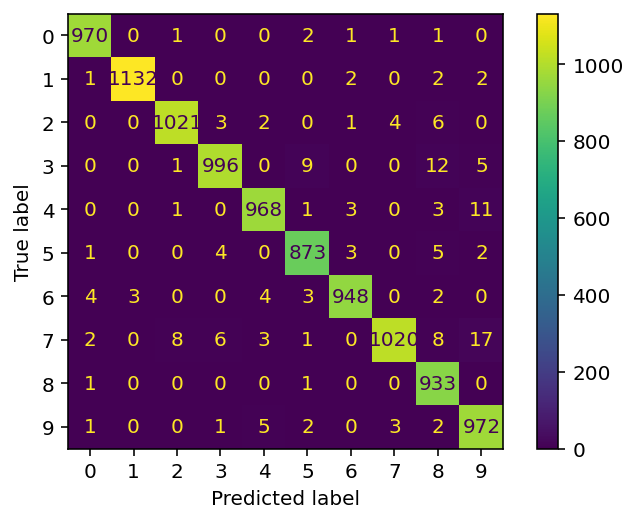

In [167]:
from random import sample
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


predicted_classes = np.argmax(model.predict(X_test), axis=-1)


correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]
print()
print(len(correct_indices)," classified correctly")
print(len(incorrect_indices)," classified incorrectly")

fig = plt.figure(figsize=(16, 16))


for i, j in enumerate(sample(range(0, len(X_test)), 25)):
    plt.subplot(5,5,i+1)
    plt.imshow(X_test[j].reshape(28,28), cmap='gray', interpolation='none')
    plt.title(
      "Pred: {}, True: {}".format(predicted_classes[j], y_test[j]))
    plt.xticks([])
    plt.yticks([])


cm = confusion_matrix(predicted_classes, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"])
disp = disp.plot()
plt.show()